# Exploratory Data Analysis on Instacart Orders

## This project will be working with data from an online grocery delivery service called Instacart. The files included with this dataset provide useful information on orders placed, products bought, specific order information, aisles the products are in, and departments of the store. The 3 main steps in this project are reading the data files and describing them, cleaning up the data (ie removing/replacing duplicate/missing values, making all columns the correct datatype, etc.), and analyzing the data to answer specific questions and creating graphs to visualize the data and interpret trends.

In [1]:
#Importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The next few cells are taking a quick look at samples from each dataframe and showing some information about the rows and data types

In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
orders_df.sample(5,random_state=1234)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
79919,1930084,38088,10,6,12,6.0
149390,1473965,70076,4,3,13,20.0
139947,1457395,171439,14,3,10,7.0
186128,2354946,199201,11,4,13,3.0
375782,1791534,70169,19,5,8,10.0


In [3]:
product_df = pd.read_csv('/datasets/products.csv', sep=';')
product_df.sample(5,random_state=1234)

,product_id,product_name,aisle_id,department_id
46265,46266,California Heirloom Monviso Peeled Garlic,32,4
42338,42339,Italian Salad Dressing & Seasoning Mix Packets,89,13
37545,37546,Sponge Cosmetic Wedges,132,11
15457,15458,NaN,100,21
34068,34069,Organic AppleBerry Applesauce on the Go,99,15


In [4]:
aisle_df = pd.read_csv('/datasets/aisles.csv', sep=';')
aisle_df.sample(5, random_state=1234)

,aisle_id,aisle
6,7,packaged meat
131,132,beauty
93,94,tea
62,63,grains rice dried goods
68,69,soup broth bouillon


In [5]:
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
departments_df.sample(5,random_state=1234)

,department_id,department
3,4,produce
13,14,breakfast
2,3,bakery
16,17,household
14,15,canned goods


In [6]:
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products_df.sample(5,random_state=1234)

,order_id,product_id,add_to_cart_order,reordered
2726383,559741,4472,10.0,1
1121722,283670,46979,15.0,0
2606682,1156198,27966,3.0,1
2400311,1858123,31714,6.0,0
2970981,3206451,44632,5.0,1


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
aisle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [12]:
# Check for duplicated orders
orders_df.duplicated().value_counts() #There are 15 duplicated rows

False    478952
True         15
dtype: int64

In [13]:
# Check for all orders placed Wednesday at 2:00 AM
wed_orders = orders_df[(orders_df['order_dow'] == 3) & (orders_df['order_hour_of_day'] == 2)]
wed_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [14]:
# Remove duplicate orders
orders_df = orders_df.drop_duplicates()

In [15]:
# Double check for duplicate rows
orders_df.duplicated().value_counts()

False    478952
dtype: int64

In [16]:
# Double check for duplicate order IDs only
orders_df.duplicated(subset='order_id').value_counts()

False    478952
dtype: int64

There were 15 duplicate rows in the orders dataframe. I used .value_counts() to see the number of duplicate rows (where True means there are duplicate rows). I used the drop_duplicates() method to get rid of the duplicates and then double checked that there were no more duplicates and no more duplicate order ids. These duplicated rows could have been caused by a system error.

### `products` data frame

In [17]:
# Check for fully duplicate rows
product_df.duplicated().value_counts() #there are no duplicate rows

False    49694
dtype: int64

In [18]:
# Check for just duplicate product IDs
product_df.duplicated(subset='product_id').value_counts() #there are no duplicate product IDs

False    49694
dtype: int64

In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
product_df['product_name'] = product_df['product_name'].str.lower()
product_df['product_name'].duplicated().value_counts() #there are 1361 duplicate values in the product_name column

False    48333
True      1361
Name: product_name, dtype: int64

In [20]:
# Check for duplicate product names that aren't missing
product_df['product_name'].dropna().duplicated().value_counts() #There are 104 duplicate product names that are not NaN

False    48332
True       104
Name: product_name, dtype: int64

In [21]:
#Drop duplicate product names while keeping NaNs
product_df = product_df.drop_duplicates('product_name').append(product_df[product_df['product_name'].isnull()])
product_df

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


The duplicate values in the product_name column are rows where there is no value (NaN) for 'product_name' and some names that are the same when converted to lowercase using .lower(). I used .value_counts() to check for fully duplicated rows (there were none) and to check for duplicate product_id values since in this case each identifier should be unique. Next I checked for duplicate values in the product name column using .lower() to transform all strings to lowercase for easier comparison and found 1361 duplicate values. Then checking for duplicates excluding NaN values using .drop_na() and found 104 names that were duplicates. I then dropped all duplicate product names while keeping NaNs to fix at a later step.

### `departments` data frame

In [22]:
#Check for fully duplicated rows
departments_df.duplicated().value_counts()

False    21
dtype: int64

In [23]:
#Check for duplicated values in each column
print(departments_df['department_id'].duplicated().value_counts())
print(departments_df['department'].duplicated().value_counts())

False    21
Name: department_id, dtype: int64
False    21
Name: department, dtype: int64


Using .duplicated() and .value_counts(), I found that there are no duplicate rows or duplicate values in each column.

### `aisles` data frame

In [24]:
#Check for fully duplicated rows
aisle_df.duplicated().value_counts()

False    134
dtype: int64

In [25]:
#Check for duplicated values in each column
print(aisle_df['aisle_id'].duplicated().value_counts())
print(aisle_df['aisle'].duplicated().value_counts())

False    134
Name: aisle_id, dtype: int64
False    134
Name: aisle, dtype: int64


Using .duplicated() and .value_counts(), I found that there are no duplicate rows or duplicate values in each column.

### `order_products` data frame

In [26]:
# Check for fullly duplicate rows
order_products_df.duplicated().value_counts()

False    4545007
dtype: int64

In [27]:
# Double check for any other tricky duplicates
print(order_products_df['order_id'].duplicated().value_counts())
print(order_products_df['product_id'].duplicated().value_counts())
print(order_products_df[order_products_df.duplicated(['order_id','product_id'])]) #I used this method to find duplicate pairs

True     4094961
False     450046
Name: order_id, dtype: int64
True     4499434
False      45573
Name: product_id, dtype: int64
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Using .duplicated() and .value_counts, I found that there are no duplicate rows. However, there are duplicate values in the order_id column and product_id but that is ok since one order can have multiple product_ids and a product_id can be in different order_ids. I also searched for columns/rows that have the same order_id/product_id pair and found none. Ultimately, I have determined that there is no duplicates that will interfere with analysis so I will not remove/replace the missing values.

## Find and remove missing values


### `products` data frame

In [28]:
#Check for NaN values
product_df.isnull().value_counts() #shows where there are NaN values. There are 1258 rows with missing aisle_id

product_id  product_name  aisle_id  department_id
False       False         False     False            48332
            True          False     False             1259
dtype: int64

In [29]:
# Are all of the missing product names associated with aisle ID 100?
null_data = product_df[product_df.isnull().any(axis=1)] #shows which rows have NaN values
print(null_data)
null_data['aisle_id'].value_counts() #shows that all rows with aisle_id = 100 have NaN as product_name

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1259 rows x 4 columns]


100    1259
Name: aisle_id, dtype: int64

In [30]:
# Are all of the missing product names associated with department ID 21?
null_data['department_id'].value_counts() #shows that all rows with department_id = 21 have Nan as product_name

21    1259
Name: department_id, dtype: int64

In [31]:
# What is this ailse and department?
print(aisle_df[aisle_df['aisle_id'] == 100]) #the aisle is labeled as missing
print()
print(departments_df[departments_df['department_id'] == 21]) #the department is labeled as missing

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [32]:
# Fill missing product names with 'Unknown'
product_df = product_df.fillna('Unknown')
product_df['product_name'].isnull().value_counts()

False    49591
Name: product_name, dtype: int64

I checked for missing values using .isnull() and .value_counts() and found that there are 1258 missing values in the product_name column. I confirmed that all missing values are associated with aisle_id = 100 and department_id = 21. The aisle and department these values correspond to are both labeled as 'missing'. The missing product names have been replaced by 'Unknown' by using .fillna(). These are in the dataset since items in a grocery store may have been mislabled or they do not have a label at all and for convenience they are logged as 'missing' to keep some record of them instead of not being accounted for at all.

### `orders` data frame

In [33]:
#Check for NaN values
orders_df.isnull().value_counts() #there are 28817 rows with a missinng days_since_prior_order values

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
                                                               True                       28817
dtype: int64

In [34]:
# Are there any missing values where it's not a customer's first order?
null_orders = orders_df[orders_df.isnull().any(axis=1)] #shows which rows have NaN values
print(null_orders)
null_orders['order_number'].value_counts() #rows with order_number = 1 are the only rows with missing values

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

1    28817
Name: order_number, dtype: int64

In [35]:
orders_df = orders_df.fillna(-1) #fill missing days_since_prior_order values with -1
print(orders_df['days_since_prior_order'].isna().value_counts())
orders_df[orders_df['order_number'] == 1]

False    478952
Name: days_since_prior_order, dtype: int64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,-1.0
96,787445,25685,1,6,18,-1.0
100,294410,111449,1,0,19,-1.0
103,2869915,123958,1,4,16,-1.0
104,2521921,42286,1,3,18,-1.0
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,-1.0
478896,2222353,141211,1,2,13,-1.0
478922,2272807,204154,1,1,15,-1.0
478926,2499542,68810,1,4,19,-1.0


Using .isnull() and .value_counts() I found that there were 28817 rows with missing values exclusivley in the days_since_prior_order column. I printed the rows where there are missing values and they seem to pair with order_number = 1 (meaning that this is a persons first order). I decided to fill those missing values with -1 (using .fillna(-1)) to denote that this column is not applicable to those whose this is their first order. Now the dataframe contains no missing values and now has useful information in each row. These missing values are in the dataframe because there was no set value to mark which customers were placing there first order, so it was left blank in the csv.

### `order_products` data frame

In [36]:
#Check for NaN values
order_products_df.isnull().value_counts() #there are 836 missing values in the add_to_cart_order

order_id  product_id  add_to_cart_order  reordered
False     False       False              False        4544171
                      True               False            836
dtype: int64

In [37]:
# What are the min and max values in this column?
print('Max value in add_to_cart_order:',order_products_df['add_to_cart_order'].max())
print('Min value in add_to_cart_order:',order_products_df['add_to_cart_order'].min())

Max value in add_to_cart_order: 64.0
Min value in add_to_cart_order: 1.0


In [38]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

null_order_products = order_products_df[order_products_df.isnull().any(axis=1)] #shows which rows have NaN values

order_id_missing_vals = null_order_products[['order_id']]#saves all order_id values that have missing values in add_to_cart_order

missing_orders = order_id_missing_vals['order_id'].unique() #creates a list of unique order ids with missing add to cart values

order_products_df[order_products_df['order_id'].isin(missing_orders)]['order_id'].value_counts() #counts how many products each
                                                                                                 #order has

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
747668      65
2170451     65
2729254     65
2652650     65
9310        65
Name: order_id, Length: 70, dtype: int64

In [39]:
# Do all orders with missing values have more than 64 products?
order_products_df[order_products_df['order_id'].isin(missing_orders)]['order_id'].value_counts().min()
#all orders with missing add_to_cart values have more than 64 products ordered

65

In [40]:
# Replace missing values with 999 and convert column to integer type
order_products_df = order_products_df.fillna(999).astype(int) #all missing values are replaced with 999 and the entire dataframe
                                                              # is now all integers
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


In this dataframe all missing values were in the add_to_cart_order column with 836 rows with missing values. The max and min values of that column were 64 and 1 respectively. All orders with missing values have less than 64 items in their order. The missing values were replaced with 999 using .fillna() and converting all columns to int using .astype(int). These missing values are in the dataset possibly due to a system error or a non-number was entered.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [41]:
print(np.sort(orders_df['order_hour_of_day'].unique())) #order_hour_of_day values are sensible ranging from 0-23
orders_df['order_hour_of_day'].between(0,23).all()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


True

In [42]:
print(np.sort(orders_df['order_dow'].unique()))#order_dow values are sensible ranging from 0-6
orders_df['order_dow'].between(0,6).all()

[0 1 2 3 4 5 6]


True

### [A2] What time of day do people shop for groceries?

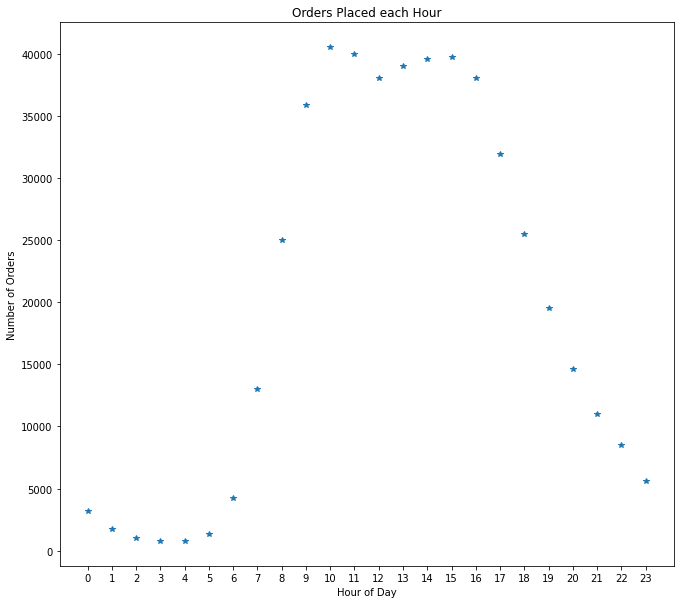

In [43]:
#Create a point graph that shows the distribution of the time of day people shop for groceries
x_ticks= np.sort(orders_df['order_hour_of_day'].value_counts().index) #creates an array of the sorted index values for x axis

orders_df['order_hour_of_day'].value_counts().plot(style='*', figsize=[11,10],
                                                  title='Orders Placed each Hour',
                                                  xlabel='Hour of Day',
                                                  ylabel='Number of Orders',
                                                  xticks=x_ticks,
                                                  )
plt.show()

The most popular hours to order groceries are between the hours of 9 and 16. Assuming hour 9 is 9 a.m., then most people shop for groceries between 9 a.m. and 4 p.m. (late morning to afternoon). However hour 10 is the most popular for grocery shopping. To create this graph I used .plot and plt.show(). For the parameters in .plot() I put a descriptive title, changed the style to * since I want to show points at each x tick, adjusted the figsize to make the points look neat, gave appropriate x and y lables, and adjusted the xticks so that each hour of the day (0-23) is marked and each point can be associated with its x value. I also used .value_counts() to count the number of orders at each hour instead of plotting every row in the dataframe.

### [A3] What day of the week do people shop for groceries?

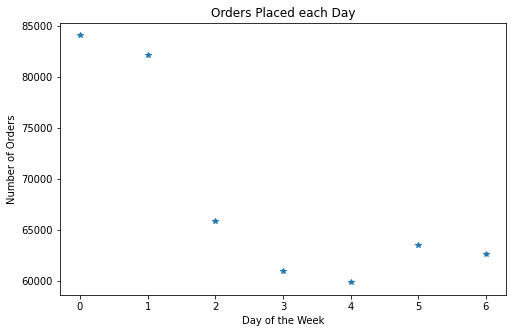

In [44]:
#Create a point graph to show the distribution of the days of the week people shop for groceries.

orders_df['order_dow'].value_counts().plot(style='*', figsize=[8,5],
                                                  title='Orders Placed each Day',
                                                  xlabel='Day of the Week',
                                                  ylabel='Number of Orders',
                                                  
                                                  )
plt.show()



Day of the week 0 and 1 are the most popular days for grocery shopping. Assuming day 0 is Sunday, then Sunday and Monday are the most popular. To create this graph, I used .plot() and plt.show(). For the .plot() parameters, I put a descriptive title, modified the figsize to show the points neatly, used style '*' to show the points, added appropriate x and y lables. I used .value_counts() to get how many people ordered each day of the week instead of plotting every row in the dataframe.

### [A4] How long do people wait until placing another order?

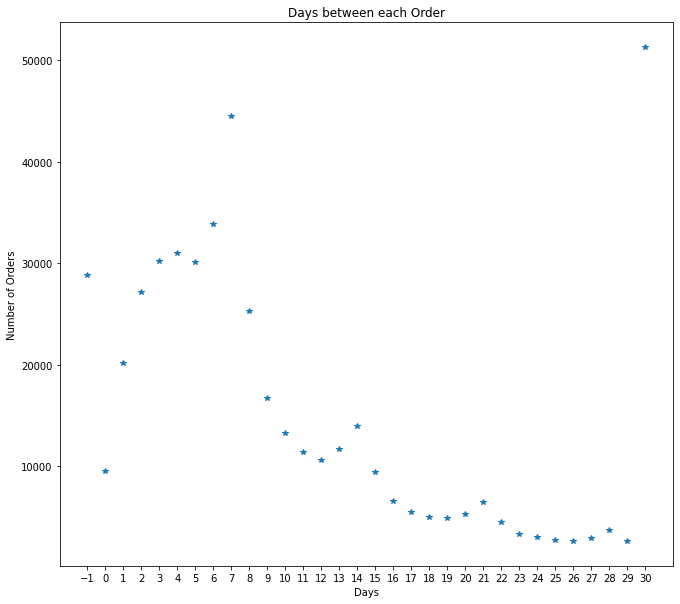

In [45]:
x_ticks= np.sort(orders_df['days_since_prior_order'].value_counts().index)

orders_df['days_since_prior_order'].value_counts().plot(style='*', figsize=[11,10],
                                                  title='Days between each Order',
                                                  xlabel='Days',
                                                  ylabel='Number of Orders',
                                                  xticks=x_ticks
                                                  )
plt.show()

30 days is the most popular wait time between each order and 26 days is the least popular. To create this graph I used .plot() and plt.show(). For the .plot parameters, I added a descriptive title, changed the style to '*' to see the points, adjusted the figsize to show the data neatly, added appropriate x and y lables, and adjusted the xticks to show each number of days clearly on the x axis.

In [46]:
print(np.sort(orders_df['days_since_prior_order'].value_counts().index)) #shows all values of days that pass before a person
                                                                         #makes another order
orders_df['days_since_prior_order'].max() #shows the most days that pass before a person makes another order

[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


30.0

Excluding -1, 0 is the minimum amount of days that pass before a person makes another order and 30 days is the maximum days that pass.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [47]:
orders_wed = orders_df[orders_df['order_dow'] == 3] #gets all wednesday orders

In [48]:
orders_sat = orders_df[orders_df['order_dow'] == 6] #gets all saturday orders

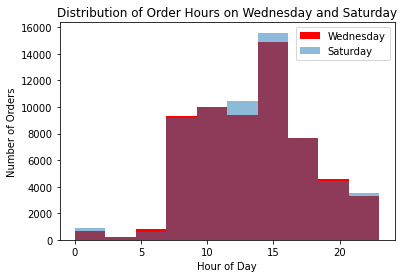

In [49]:
#Create histograms of wednesday and saturday distributions on the order hour of the day
plt.hist(orders_wed['order_hour_of_day'], label = 'Wednesday', color='red')
plt.hist(orders_sat['order_hour_of_day'], label = 'Saturday', alpha=0.5)
plt.title('Distribution of Order Hours on Wednesday and Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

The two histograms follow the same trends such as hours 15 and 16 are the most popular times to order. There are some slight differences in the early hours of the day and the late hours of the day. The biggest difference is that Saturday has a sizable amount more orders around hours 13-14 and 15-16, suggesting that Saturday has more orders placed than Wednesday.

### [B2] What's the distribution for the number of orders per customer?

In [50]:
#Get the value counts of the number of orders every customer has
orders_per_cust = orders_df['user_id'].value_counts()
orders_per_cust

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64

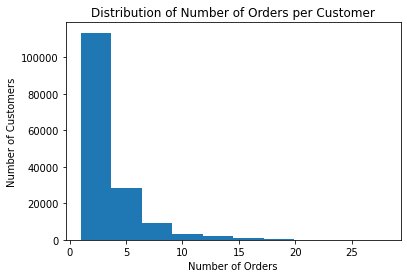

In [51]:
#Create histogram of number of orders per customer
plt.hist(orders_per_cust)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

Most customers make between 1 and 5 orders which makes up the majority of all orders placed. Placing 5 or less orders is the most common among this data.

### [B3] What are the top 20 popular products (display their id and name)?

In [52]:
#Get the top 20 product ids by value counts
top_20_ids = order_products_df['product_id'].value_counts().head(20).index.tolist()
top_20_ids

[24852,
 13176,
 21137,
 21903,
 47209,
 47766,
 47626,
 16797,
 26209,
 27845,
 27966,
 22935,
 24964,
 45007,
 39275,
 49683,
 28204,
 5876,
 8277,
 40706]

In [53]:
#Get all rows of the top 20 products
products = product_df[product_df['product_id'].isin(top_20_ids)]
products

,product_id,product_name,aisle_id,department_id
5875,5876,organic lemon,24,4
8276,8277,apple honeycrisp organic,24,4
13175,13176,bag of organic bananas,24,4
16796,16797,strawberries,24,4
21136,21137,organic strawberries,24,4
21902,21903,organic baby spinach,123,4
22934,22935,organic yellow onion,83,4
24851,24852,banana,24,4
24963,24964,organic garlic,83,4
26208,26209,limes,24,4


In [54]:
#Show the top 20 product ids and names
p = products[['product_id', 'product_name']]
p.set_index("product_id", inplace=True)
print(p)

                        product_name
product_id                          
5876                   organic lemon
8277        apple honeycrisp organic
13176         bag of organic bananas
16797                   strawberries
21137           organic strawberries
21903           organic baby spinach
22935           organic yellow onion
24852                         banana
24964                 organic garlic
26209                          limes
27845             organic whole milk
27966            organic raspberries
28204             organic fuji apple
39275            organic blueberries
40706         organic grape tomatoes
45007               organic zucchini
47209           organic hass avocado
47626                    large lemon
47766                organic avocado
49683                 cucumber kirby


I used the .value_counts() on the product ids and used .head(20) to get the top 20 counts then used .index to grab the indexes which are the ids and .tolist() to make a list of the top 20 ids to be used to find the top 20 products.I created a new dataframe called products and used conditional filtering to gather all the rows that correspond to the product ids. I then printed only the product ids and the product names.

# [C] Hard (must complete all to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [55]:
#Get the counts for the number of times an order_id is found, indicating the number of products they ordered
products_ordered = order_products_df['order_id'].value_counts()
products_ordered

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64

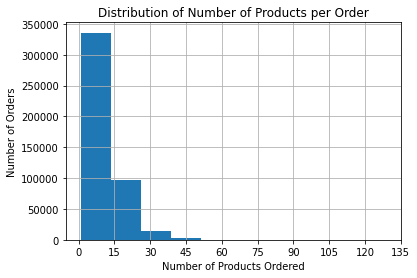

In [56]:
#Create a histogram of the distribution of products purchased per order
plt.hist(products_ordered)
plt.title('Distribution of Number of Products per Order')
plt.xlabel('Number of Products Ordered')
plt.ylabel('Number of Orders')
plt.xticks([x*15 for x in range(10)])
plt.grid(True)
plt.show()

In [57]:
#Find the average products ordered per customer
products_ordered.mean()

10.098983215049127

Out of more than 450,000 products ordered, over 300,000 of them are in orders that total less than 15 products per order. The graph shows that customers are more than likely to order at most 15 products at a time. Out of all orders, the average number of products per order is around 10 products.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [58]:
#Get the top 20 product ids that are the most reordered
top_20_prod_id = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts().head(20).index.tolist()
top_20_prod_id

[24852,
 13176,
 21137,
 21903,
 47209,
 47766,
 27845,
 47626,
 27966,
 16797,
 26209,
 22935,
 24964,
 45007,
 49683,
 28204,
 8277,
 39275,
 5876,
 49235]

In [59]:
#Get the rows that correspond to the top 20 most reordered product ids
top_20_rows = product_df[product_df['product_id'].isin(top_20_prod_id)]
top_20_rows

,product_id,product_name,aisle_id,department_id
5875,5876,organic lemon,24,4
8276,8277,apple honeycrisp organic,24,4
13175,13176,bag of organic bananas,24,4
16796,16797,strawberries,24,4
21136,21137,organic strawberries,24,4
21902,21903,organic baby spinach,123,4
22934,22935,organic yellow onion,83,4
24851,24852,banana,24,4
24963,24964,organic garlic,83,4
26208,26209,limes,24,4


In [60]:
#Display the top 20 most reordered products by name and id
p = top_20_rows[['product_id', 'product_name']]
p.set_index("product_id", inplace=True)
p

,product_name
product_id,
5876,organic lemon
8277,apple honeycrisp organic
13176,bag of organic bananas
16797,strawberries
21137,organic strawberries
21903,organic baby spinach
22935,organic yellow onion
24852,banana
24964,organic garlic


The nearly all products are some type of vegetable or fruit.